In [1]:
import os
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from adjustText import adjust_text

In [2]:
# Grab list of files from `outputs` directory
# For each file, read the contents

outputs = {}
with os.scandir('outputs') as entries:
    for entry in entries:
        if entry.is_file():
            with open(entry, 'r') as f:
                outputs[entry.name] = f.read()

print(outputs)

{'output_mpi_1nodes_3cpus.192': 'Time to scatter data: 0.2624 seconds\nRank 0: Average time per calculation: 0.0184 seconds\nRank 1: Average time per calculation: 0.0204 seconds\nRank 2: Average time per calculation: 0.0219 seconds\nTime to gather results: 96.0756 seconds\nFile saved as: subsets_mcs_multi.pickle\nTotal Time: 595.4426 seconds\n', 'output_mpi_2nodes_1cpus.194': 'Time to scatter data: 0.7302 seconds\nRank 1: Average time per calculation: 0.0206 seconds\nRank 0: Average time per calculation: 0.0429 seconds\nTime to gather results: 0.2841 seconds\nFile saved as: subsets_mcs_multi.pickle\nTotal Time: 1750.7271 seconds\n', 'output_mpi_1nodes_1cpus.190': 'Time to scatter data: 0.6689 seconds\nRank 0: Average time per calculation: 0.0302 seconds\nTime to gather results: 0.1271 seconds\nFile saved as: subsets_mcs_multi.pickle\nTotal Time: 2457.4575 seconds\n', 'output_mpi_2nodes_2cpus.195': 'Time to scatter data: 0.3281 seconds\nRank 0: Average time per calculation: 0.0153 secon

In [3]:
# Parse data
# Remove output_mpi_ prefix and the suffix ".{some_numbers}" from the key
# Grab number of nodes from the number before nodes in the key
# Grab number of cores from the number before cpus in the key
# Grab out scatter data time from line that has Time to scatter data: 
# Grab Average time per calculation from line that has Average time per calculation:
# Grab Time to gather data from line that has Time to gather results:
# Grab Total time from line that has Total Time:
data = {}
for key, value in outputs.items():
    key = key.replace('output_mpi_', '').split('.')[0]
    nodes = key.split('nodes')[0]
    cores = key.split('cpus')[0].split('nodes_')[-1]

    value = value.split('\n')
    avg_times = []
    for line in value:
        if 'Time to scatter data:' in line:
            scatter_data = line.split(': ')[-1]
        if 'Average time per calculation:' in line:
            avg_times.append(line.split(': ')[-1])
        if 'Time to gather results:' in line:
            gather_results = line.split(': ')[-1]
        if 'Total Time:' in line:
            total_time = line.split(': ')[-1]
    data[key] = {
        'nodes': nodes,
        'cores': cores,
        'scatter_data': scatter_data,
        'avg_time': avg_times,
        'gather_results': gather_results,
        'total_time': total_time
    }

pprint(data)

{'1nodes_1cpus': {'avg_time': ['0.0302 seconds'],
                  'cores': '1',
                  'gather_results': '0.1271 seconds',
                  'nodes': '1',
                  'scatter_data': '0.6689 seconds',
                  'total_time': '2457.4575 seconds'},
 '1nodes_2cpus': {'avg_time': ['0.0172 seconds', '0.0431 seconds'],
                  'cores': '2',
                  'gather_results': '0.2148 seconds',
                  'nodes': '1',
                  'scatter_data': '0.6978 seconds',
                  'total_time': '1758.7047 seconds'},
 '1nodes_3cpus': {'avg_time': ['0.0184 seconds',
                               '0.0204 seconds',
                               '0.0219 seconds'],
                  'cores': '3',
                  'gather_results': '96.0756 seconds',
                  'nodes': '1',
                  'scatter_data': '0.2624 seconds',
                  'total_time': '595.4426 seconds'},
 '1nodes_4cpus': {'avg_time': ['0.0202 seconds',
             

In [4]:
# Sort data by total_time
sorted_data = dict(sorted(data.items(), key=lambda x: float(x[1]['total_time'].split(' ')[0]), reverse=True))
for key, value in sorted_data.items():
    print(key, value['total_time'])

1nodes_1cpus 2457.4575 seconds
1nodes_2cpus 1758.7047 seconds
2nodes_1cpus 1750.7271 seconds
1nodes_3cpus 595.4426 seconds
3nodes_1cpus 513.5009 seconds
1nodes_4cpus 475.2539 seconds
2nodes_2cpus 351.1723 seconds
3nodes_2cpus 289.4431 seconds
2nodes_3cpus 285.8903 seconds
2nodes_4cpus 254.3435 seconds
3nodes_3cpus 204.7895 seconds
3nodes_4cpus 172.4459 seconds


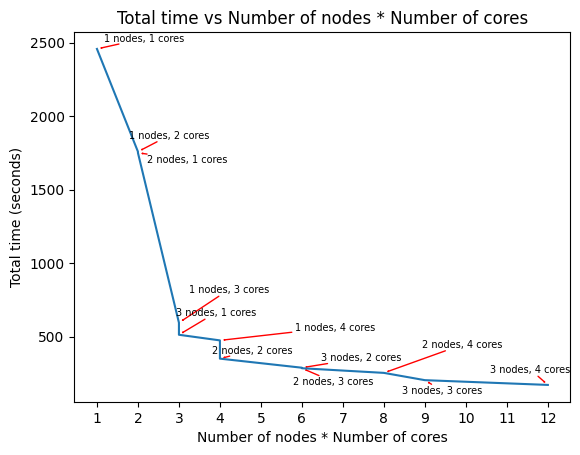

In [5]:
# Graph total time vs number of cpus and number of nodes
# Majors would be the number of nodes
# x value is the number of nodes * number of cpus
# Each points has a label of the number of nodes and number of cpus


x = []
y = []
labels = []
for key, value in sorted_data.items():
    x.append(int(value['nodes']) * int(value['cores']))
    y.append(float(value['total_time'].split(' ')[0]))
    labels.append(f'{value["nodes"]} nodes, {value["cores"]} cores')

plt.plot(x, y)

texts = [plt.text(x[i], y[i], labels[i], fontsize=7) for i in range(len(x))]
adjust_text(texts, expand=(1.2, 2), arrowprops=dict(arrowstyle='->', color='red'))

# Adjust x-ticks to be every 1 core
plt.xticks(range(1, 13, 1))

plt.xlabel('Number of nodes * Number of cores')
plt.ylabel('Total time (seconds)')
plt.title('Total time vs Number of nodes * Number of cores')
plt.show()


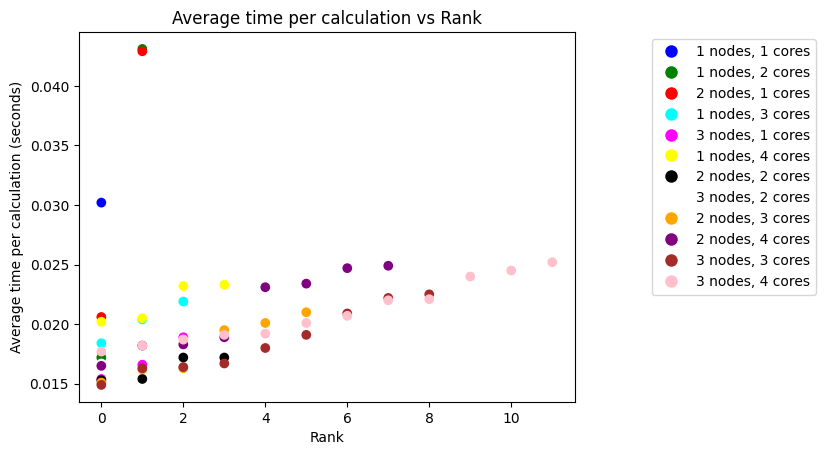

In [20]:
# Plot the average time per calculation vs rank, where the color of the point is the for each time test

Colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'black',
    'white',
    'orange',
    'purple',
    'brown',
    'pink'
]

x = []
y = []
colors = []
labels = []
unique_combinations = {}
for key, value in sorted_data.items():
    config_label = f'{value["nodes"]} nodes, {value["cores"]} cores'

    if config_label not in unique_combinations:
        unique_combinations[config_label] = Colors[len(unique_combinations) % len(Colors)]

    for i, avg_time in enumerate(value['avg_time']):
        x.append(i)
        y.append(float(avg_time.split(' ')[0]))
        colors.append(unique_combinations[config_label])
        labels.append(config_label)

plt.scatter(x, y, c=colors)

legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in unique_combinations.items()]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.5, 1))

plt.xlabel('Rank')
plt.ylabel('Average time per calculation (seconds)')
plt.title('Average time per calculation vs Rank')
plt.show()